Experiment 1
mean error xbar -0.01900220987364138
mean error median -0.013860874410234645
Experiment 2
RMSE biased 0.5309061077856495
RMSE unbiased 0.6005029787809649
standard error 0.7496185933441688
confidence interval (1.2931206650147968, 3.550244152439231)
standard error 2 0.20314064841685056
confidence interval 2 (1.7033238391961858, 2.3541955792608147)


0.20314064841685056

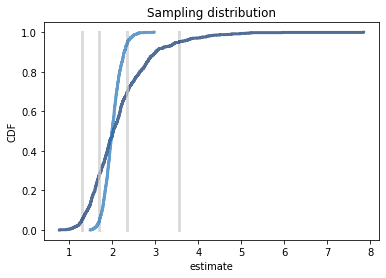

In [11]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import brfss
import estimation

import thinkstats2
import thinkplot
import random

#Exercise 8-1
#First need to define MeanError. According to this article the Mean Error "is the average of all errors within a set," or in this case within the estimate. (https://www.statisticshowto.datasciencecentral.com/mean-error/)
def MeanError(estimates, actual):
    #The estimates is our sequence of numbers, while actual is what it sounds like and is our actual value.
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors) #Just like it sounds we're getting the mean of errors
#To accomplish the second part of the exercise we first need to define the RMSE otherwise known as root mean squared error. 
def RMSE(estimates, actual):
    #Again our estimate is the sequence of numbers, while actual is our actual values.
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse) #RMSE is the square root of the MSE
#First experiment. This simulates the estimation game pg 92 from our text
def Estimate4(n=7, m=1000):
    #First part of the exercise. N is the sample size and m is the number of times we "play the game"
    mu = 0
    sigma = 1
    #Going through 1000 iterations of the game to find the median and means
    means = []
    medians = []
    for _ in range(m):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print('Experiment 1')
    print('mean error xbar', MeanError(means, mu)) #Finding the mean error of sample mean
    print('mean error median', MeanError(medians, mu)) #Finding mean error of median
    
Estimate4() #Not sure on the accuracy of the numbers here. Both the mean erro xbar and mean error median are very low, so I think in this case there isn't much bias. 
#Second experiment. Again we're simulating the estimation game
def Estimate5(n=7, m=1000):
    #N is the sample size and m is the number of times we iterate or play the game.
    mu = 0
    sigma = 1
    #Going through 1000 iterations of the game to find our estimates for biased and unbiased.
    estimates1 = []
    estimates2 = []
    for _ in range(m):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)

    print('Experiment 2')
    print('RMSE biased', RMSE(estimates1, sigma**2)) #Finding the biased RMSE
    print('RMSE unbiased', RMSE(estimates2, sigma**2)) #Finding the unbiased RMSE

Estimate5() #RMSE biased is just slightly lower than the RMSE unbiased. 

#Exercise 8-2
#Defining our sample according to exercise where n=10 (sample size), lam=2 (paramter of the exponential distribution), and m=1000(number of iterations or times we play the game)
def SimulateSample(lam=2, n=10, m=1000):
    #Setting the x,y standards for the plot
    def VertLine(x, y=1):
        thinkplot.Plot([x, x], [0, y], color='0.8', linewidth=3)
    #Going through the 1000 iterations
    estimates = []
    for _ in range(m):
        xs = np.random.exponential(1.0/lam, n)
        lamhat = 1.0 / np.mean(xs)
        estimates.append(lamhat)
    #Finding our standard error, which is the measure of how far we expec the estimate to be off on average.
    stderr = RMSE(estimates, lam)
    print('standard error', stderr)

    cdf = thinkstats2.Cdf(estimates)
    ci = cdf.Percentile(5), cdf.Percentile(95)
    print('confidence interval', ci) #Finding the confidence interval, which is a range that includes a given fraction of the sampling distribution.
    VertLine(ci[0])
    VertLine(ci[1])

    # plot the CDF
    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel='estimate',
                     ylabel='CDF',
                     title='Sampling distribution')

    return stderr

SimulateSample() #Standard error = 0.70, Output 0.70, Confidence interval 1.3, 3.5

#Going to try another sample with n=100
def SimulateSample2(lam=2, n=100, m=1000):
    #Setting the x,y standards for the plot
    def VertLine(x, y=1):
        thinkplot.Plot([x, x], [0, y], color='0.8', linewidth=3)
    #Going through the 1000 iterations
    estimates = []
    for _ in range(m):
        xs = np.random.exponential(1.0/lam, n)
        lamhat = 1.0 / np.mean(xs)
        estimates.append(lamhat)
    #Finding our standard error, which is the measure of how far we expec the estimate to be off on average.
    stderr = RMSE(estimates, lam)
    print('standard error 2', stderr)

    cdf = thinkstats2.Cdf(estimates)
    ci = cdf.Percentile(5), cdf.Percentile(95)
    print('confidence interval 2', ci) #Finding the confidence interval, which is a range that includes a given fraction of the sampling distribution.
    VertLine(ci[0])
    VertLine(ci[1])

    # plot the CDF
    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel='estimate',
                     ylabel='CDF',
                     title='Sampling distribution')

    return stderr

SimulateSample2() #Standard error is 0.20, Output 0.20, Confidence interval is 1.7, 2.4

#The standard error decreased between the first time and the second. The confidence interval also decreased in the second run as well. 